# <font color='magenta'> Alexas Analysis ;)

## <font color='pink'> Introduction:
The COVID-19 epidemic undoubtedly had a large effect on our wider community. I chose this metric because I believe each neighborhood's COVID-19 infections would accurately illustrate their response to COVID-19, and thus the neighborhood's safety.


> Database:
https://data.wprdc.org/dataset/allegheny-county-covid-19-tests-cases-and-deaths/resource/0f214885-ff3e-44e1-9963-e9e9062a04d1

## <font color='pink'> The Metric:
I will be analyzing the correlation between Pittsburgh neighborhood and COVID-19 related infections.
My Dataset also covers total PCR tests, positive PCR tests, hospitalizations, deaths, and reinfections categorized by date and Pittsburgh neighborhood running from <font color='pink'> **August 14, 2020** to **April 10, 2023**

![Lets go :)!](https://media3.giphy.com/media/unzR48isp6cCY/giphy.gif?cid=ecf05e47t88hr8iu952kd4rvucsvymr1cjdbvtcb1r9ewvfy&rid=giphy.gif&ct=g)



## <font color='pink'> The Analysis:
First, lets import our database...

In [2]:
# Alexa Mckee
# CMPINF 0010 Spring 2023

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

covid = pd.read_csv("covid-database.csv") #read in database
        
covid.head(100) #display first 100

,neighborhood_municipality,infections,reinfections,deaths,hospitalizations,pcr_tests,positive_pcr_tests,update_date
0,Aleppo,2146,169,19,27,2879,323,2023-04-10
1,Allegheny Center (Pittsburgh),1701,195,5,19,3127,414,2023-04-10
2,Allegheny West (Pittsburgh),523,76,0,5,1133,119,2023-04-10
3,Allentown (Pittsburgh),3525,582,2,39,5154,681,2023-04-10
4,Arlington (Pittsburgh),2601,397,9,35,4050,502,2023-04-10
...,...,...,...,...,...,...,...,...
95,Homestead,4966,946,11,87,7367,959,2023-04-10
96,Homewood North (Pittsburgh),3938,810,8,80,6152,720,2023-04-10
97,Homewood South (Pittsburgh),3812,521,9,84,5827,690,2023-04-10
98,Homewood West (Pittsburgh),945,113,0,17,1508,158,2023-04-10


> Thats a lot of information! Let's just look at the neighborhoods in Pittsburgh & filter out undefined neighborhoods... I also don't need all these columns, lets clean things up to only show neighborhood names with infections

In [3]:
covid_mask1 = covid['neighborhood_municipality'] != ('Undefined (Pittsburgh)') #filter out outlying areas recorded by database (labelled as undefined)
infections = covid[covid_mask1]

covid_mask = infections['neighborhood_municipality'].str.contains("Pittsburgh") #filter mask to only show cases in pittsburgh
infections = infections[covid_mask]

columns = ["neighborhood_municipality","infections"] #only want these columns

for i in infections.columns:
    if i not in columns:
        del infections[i] #delete unneccessary columns from view

sort = infections.sort_values( by="infections", ascending=True) #Sorting by Least infections to date
sort.head(10)

,neighborhood_municipality,infections
5,Arlington Heights (Pittsburgh),213
185,St. Clair (Pittsburgh),251
41,Chateau (Pittsburgh),262
208,West End (Pittsburgh),277
90,Hays (Pittsburgh),332
175,South Shore (Pittsburgh),364
128,Mt. Oliver (Pittsburgh),471
2,Allegheny West (Pittsburgh),523
68,Esplen (Pittsburgh),526
40,Chartiers City (Pittsburgh),652


> Now lets create a corresponding dictionary to later graphically represent

In [5]:
covidDict = {} #create a dictionary to later graph

for index, row in sort.iterrows():
    name = row[1]
    quantity = row[0]

    if name in covidDict:
        covidDict[name] = covidDict[name] + quantity 
    else:
        covidDict[name] = quantity

top10 = dict(list(covidDict.items())[0: 10]) #filters only the top 10 lowest infection totals
 
for item, freq in top10.items(): #print results!
    print(item,freq)

213 Arlington Heights (Pittsburgh)
251 St. Clair (Pittsburgh)
262 Chateau (Pittsburgh)
277 West End (Pittsburgh)
332 Hays (Pittsburgh)
364 South Shore (Pittsburgh)
471 Mt. Oliver (Pittsburgh)
523 Allegheny West (Pittsburgh)
526 Esplen (Pittsburgh)
652 Chartiers City (Pittsburgh)


## <font color='pink'> Graphs

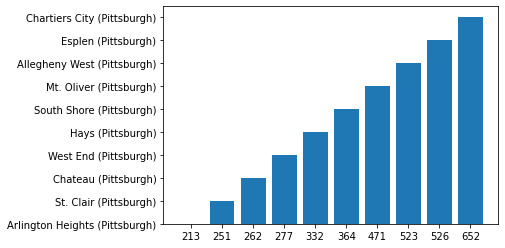

In [43]:
names = list(top10.keys())
values = list(top10.values())

plt.bar(range(10), values, tick_label=names)
plt.show()

## <font color='pink'> The Best Neighborhood:
Applying this metric, the safest neighborhood in terms of lowest COVID-19 related infectioins is <font color='pink'> **Arlington Heights** ! 
    
    
![Winner Winner](https://media4.giphy.com/media/scGEXUBdf7G48/giphy.gif?cid=ecf05e47mhco8ix6n11sm7d31is5l2190dhz436dfy82iq2g&rid=giphy.gif&ct=g)